Import Libary

In [43]:
import pandas as pd 

import nltk

import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alfar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Import Data

In [45]:
data = pd.read_csv('data/data.csv',encoding='latin1')

### **Prepocessing**

Case Folding

In [46]:
import re
import unicodedata

def casefolding(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    text = text.lower()
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'\S+@\S+', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'_', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [47]:
# Sample 10 random texts from the DataFrame
random_samples = data['full_text'].sample(n=10, random_state=42)

# Apply case folding to each sampled text
case_folded_samples = random_samples.apply(casefolding)

# Compare before and after case folding
comparison_df = pd.DataFrame({'Sebelum Case Folding': random_samples, 'Sesudah Case Folding': case_folded_samples})

# Set the option to display more characters per column
pd.set_option('display.max_colwidth', None)

# Display the comparison DataFrame
display(comparison_df)

,Sebelum Case Folding,Sesudah Case Folding
1198,Berdasarkan susunan Kabinet Merah Putih Kementerian Hukum dan Hak Asasi Manusia (Kemenkumham) bertransformasi mjdi satu kementerian koordinator dan tiga kementerian. #KemenkumhamRI #KumhamPASTI,berdasarkan susunan kabinet merah putih kementerian hukum dan hak asasi manusia kemenkumham bertransformasi mjdi satu kementerian koordinator dan tiga kementerian kemenkumhamri kumhampasti
526,Profil Dudy Purwagandhi Pentolan PLN yang Dilantik Menjadi Menteri Perhubungan Kabinet Merah Putih https://t.co/FMPHKJMTqJ #beritasatu #news #berita,profil dudy purwagandhi pentolan pln yang dilantik menjadi menteri perhubungan kabinet merah putih beritasatu news berita
393,Kemenkumham shiap Bertransformasi dalam Kabinet Merah Putih https://t.co/pFygWMWV6K,kemenkumham shiap bertransformasi dalam kabinet merah putih
1407,*Kemenkumham Siap Bertransformasi dalam Kabinet Merah Putih* https://t.co/WYyYkNfekg,kemenkumham siap bertransformasi dalam kabinet merah putih
433,Lima Menteri di Kabinet Merah Putih Prabowo &amp; Gibran memiliki harta kekayaan yang fantastis. https://t.co/Zg1UKbTuA5,lima menteri di kabinet merah putih prabowo amp gibran memiliki harta kekayaan yang fantastis
1719,Presiden Prabowo Lantik Menteri dan Pejabat Setingkat Menteri Kabinet Merah Putih https://t.co/GtU4GkDkZS,presiden prabowo lantik menteri dan pejabat setingkat menteri kabinet merah putih
1090,Presiden Prabowo Subianto melantik menteri Kabinet Merah Putih. Beberapa menteri memiliki kekayaan triliunan rupiah. Berikut deretannya yang terkaya. https://t.co/ifOjuMbfoD,presiden prabowo subianto melantik menteri kabinet merah putih beberapa menteri memiliki kekayaan triliunan rupiah berikut deretannya yang terkaya
429,Prabowo lantik Kabinet Merah Putih berikut nama-namanya #Kabinetmerahputih #PrabowoSubianto #popularitascom https://t.co/BEaQnuUJlG,prabowo lantik kabinet merah putih berikut namanamanya kabinetmerahputih prabowosubianto popularitascom
1798,kabinet Merah Putih keren! Kolaborasi Prabowo-Gibran bakal bikin perubahan nyata buat negeri tercinta https://t.co/yt9r2xWZob,kabinet merah putih keren kolaborasi prabowogibran bakal bikin perubahan nyata buat negeri tercinta
530,Budiman Sudjatmiko tdk msk jajaran menteri yang dilantik di Kabinet Merah Putih.,budiman sudjatmiko tdk msk jajaran menteri yang dilantik di kabinet merah putih


Normalize

In [48]:
try:
    key_norm = pd.read_csv('data/normalize.csv', encoding='latin1')
except UnicodeDecodeError:
    key_norm = pd.read_csv('data/normalize.csv', encoding='ISO-8859-1')

def text_normalize(text):
    words = text.split()
    normalized_words = []
    for word in words:
        if (key_norm['singkatan'] == word).any():
            normalized_word = key_norm[key_norm['singkatan'] == word]['hasil'].values[0]
            print(f"Normalizing '{word}' to '{normalized_word}'")
            normalized_words.append(normalized_word)
        else:
            normalized_words.append(word)
    return ' '.join(normalized_words)

In [49]:
# Sample 10 random texts from the DataFrame
random_samples = data['full_text'].sample(n=10, random_state=42)

# Apply case folding to each sampled text
case_folded_samples = random_samples.apply(casefolding)
text_normalize_samples = case_folded_samples.apply(text_normalize)

# Compare before and after case folding
comparison_df = pd.DataFrame({'Sebelum normalize': random_samples, 'Sesudah normalize': text_normalize_samples})

# Alternatively, if you prefer to see the comparison in tabular form
comparison_df

Normalizing 'kemenkumham' to 'kementrian hukum dan ham'
Normalizing 'mjdi' to 'menjadi'
Normalizing 'kemenkumham' to 'kementrian hukum dan ham'
Normalizing 'shiap' to 'siap'
Normalizing 'kemenkumham' to 'kementrian hukum dan ham'
Normalizing 'tdk' to 'tidak'
Normalizing 'msk' to 'masuk'


,Sebelum normalize,Sesudah normalize
1198,Berdasarkan susunan Kabinet Merah Putih Kementerian Hukum dan Hak Asasi Manusia (Kemenkumham) bertransformasi mjdi satu kementerian koordinator dan tiga kementerian. #KemenkumhamRI #KumhamPASTI,berdasarkan susunan kabinet merah putih kementerian hukum dan hak asasi manusia kementrian hukum dan ham bertransformasi menjadi satu kementerian koordinator dan tiga kementerian kemenkumhamri kumhampasti
526,Profil Dudy Purwagandhi Pentolan PLN yang Dilantik Menjadi Menteri Perhubungan Kabinet Merah Putih https://t.co/FMPHKJMTqJ #beritasatu #news #berita,profil dudy purwagandhi pentolan pln yang dilantik menjadi menteri perhubungan kabinet merah putih beritasatu news berita
393,Kemenkumham shiap Bertransformasi dalam Kabinet Merah Putih https://t.co/pFygWMWV6K,kementrian hukum dan ham siap bertransformasi dalam kabinet merah putih
1407,*Kemenkumham Siap Bertransformasi dalam Kabinet Merah Putih* https://t.co/WYyYkNfekg,kementrian hukum dan ham siap bertransformasi dalam kabinet merah putih
433,Lima Menteri di Kabinet Merah Putih Prabowo &amp; Gibran memiliki harta kekayaan yang fantastis. https://t.co/Zg1UKbTuA5,lima menteri di kabinet merah putih prabowo amp gibran memiliki harta kekayaan yang fantastis
1719,Presiden Prabowo Lantik Menteri dan Pejabat Setingkat Menteri Kabinet Merah Putih https://t.co/GtU4GkDkZS,presiden prabowo lantik menteri dan pejabat setingkat menteri kabinet merah putih
1090,Presiden Prabowo Subianto melantik menteri Kabinet Merah Putih. Beberapa menteri memiliki kekayaan triliunan rupiah. Berikut deretannya yang terkaya. https://t.co/ifOjuMbfoD,presiden prabowo subianto melantik menteri kabinet merah putih beberapa menteri memiliki kekayaan triliunan rupiah berikut deretannya yang terkaya
429,Prabowo lantik Kabinet Merah Putih berikut nama-namanya #Kabinetmerahputih #PrabowoSubianto #popularitascom https://t.co/BEaQnuUJlG,prabowo lantik kabinet merah putih berikut namanamanya kabinetmerahputih prabowosubianto popularitascom
1798,kabinet Merah Putih keren! Kolaborasi Prabowo-Gibran bakal bikin perubahan nyata buat negeri tercinta https://t.co/yt9r2xWZob,kabinet merah putih keren kolaborasi prabowogibran bakal bikin perubahan nyata buat negeri tercinta
530,Budiman Sudjatmiko tdk msk jajaran menteri yang dilantik di Kabinet Merah Putih.,budiman sudjatmiko tidak masuk jajaran menteri yang dilantik di kabinet merah putih


StopWord

In [50]:
from nltk.corpus import stopwords

stopwords_ind = stopwords.words('indonesian')
len(stopwords_ind)

758

In [51]:
more_stopword = ['kalo', 'amp', 'gini', 'biar', 'bikin', 'bilang', 'bnetwork', 'loh', '&amp', 'yah', 'zy_zy', 'mh', 'anu', 'x', 
                'yang', 'dan', 'di', 'ke', 'dari', 'ini', 'untuk', 'dengan', 'pada', 'adalah', 'itu','atau', 'sebagai', 
                'tidak', 'oleh', 'juga', 'karena', 'sudah', 'jadi', 'sangat', 'saja', 'agar','mereka', 'kami', 'kita', 'nih',
                'lah', 'kan', 'sih', 'dong', 'nya', 'deh', 'pun', 'gitu', 'tak', 'nah', 'eh', 'hanya', 'harus', 'begitu', 
                'saya', 'aku', 'anda', 'dia', 'ia', 'dalam', 'tersebut', 'bagi', 'akan','masih', 'semua', 'bisa', 'lain', 
                'mengapa', 'dapat', 'gas', 'oke', 'ada', 'kemana', 'axamandiri', 'axa', 'iya']
stopwords_ind.extend(more_stopword)

# Remove stopwords function
def remove_stop_word(text):
    words = text.split()
    clean_words = [word for word in words if word not in stopwords_ind]
    cleaned_text = ' '.join(clean_words)
    return cleaned_text

In [52]:
# Sample 10 random texts from the DataFrame
random_samples = data['full_text'].sample(n=10, random_state=42)

# Apply case folding to each sampled text
case_folded_samples = random_samples.apply(casefolding)
text_normalize_samples = case_folded_samples.apply(text_normalize)
remove_stop_word_samples = text_normalize_samples.apply(remove_stop_word)

# Compare before and after case folding
comparison_df = pd.DataFrame({'Sebelum Stop Word': random_samples, 'Sesudah Stop Word': remove_stop_word_samples})

# Alternatively, if you prefer to see the comparison in tabular form
comparison_df

Normalizing 'kemenkumham' to 'kementrian hukum dan ham'
Normalizing 'mjdi' to 'menjadi'
Normalizing 'kemenkumham' to 'kementrian hukum dan ham'
Normalizing 'shiap' to 'siap'
Normalizing 'kemenkumham' to 'kementrian hukum dan ham'
Normalizing 'tdk' to 'tidak'
Normalizing 'msk' to 'masuk'


,Sebelum Stop Word,Sesudah Stop Word
1198,Berdasarkan susunan Kabinet Merah Putih Kementerian Hukum dan Hak Asasi Manusia (Kemenkumham) bertransformasi mjdi satu kementerian koordinator dan tiga kementerian. #KemenkumhamRI #KumhamPASTI,berdasarkan susunan kabinet merah putih kementerian hukum hak asasi manusia kementrian hukum ham bertransformasi kementerian koordinator kementerian kemenkumhamri kumhampasti
526,Profil Dudy Purwagandhi Pentolan PLN yang Dilantik Menjadi Menteri Perhubungan Kabinet Merah Putih https://t.co/FMPHKJMTqJ #beritasatu #news #berita,profil dudy purwagandhi pentolan pln dilantik menteri perhubungan kabinet merah putih beritasatu news berita
393,Kemenkumham shiap Bertransformasi dalam Kabinet Merah Putih https://t.co/pFygWMWV6K,kementrian hukum ham bertransformasi kabinet merah putih
1407,*Kemenkumham Siap Bertransformasi dalam Kabinet Merah Putih* https://t.co/WYyYkNfekg,kementrian hukum ham bertransformasi kabinet merah putih
433,Lima Menteri di Kabinet Merah Putih Prabowo &amp; Gibran memiliki harta kekayaan yang fantastis. https://t.co/Zg1UKbTuA5,menteri kabinet merah putih prabowo gibran memiliki harta kekayaan fantastis
1719,Presiden Prabowo Lantik Menteri dan Pejabat Setingkat Menteri Kabinet Merah Putih https://t.co/GtU4GkDkZS,presiden prabowo lantik menteri pejabat setingkat menteri kabinet merah putih
1090,Presiden Prabowo Subianto melantik menteri Kabinet Merah Putih. Beberapa menteri memiliki kekayaan triliunan rupiah. Berikut deretannya yang terkaya. https://t.co/ifOjuMbfoD,presiden prabowo subianto melantik menteri kabinet merah putih menteri memiliki kekayaan triliunan rupiah deretannya terkaya
429,Prabowo lantik Kabinet Merah Putih berikut nama-namanya #Kabinetmerahputih #PrabowoSubianto #popularitascom https://t.co/BEaQnuUJlG,prabowo lantik kabinet merah putih namanamanya kabinetmerahputih prabowosubianto popularitascom
1798,kabinet Merah Putih keren! Kolaborasi Prabowo-Gibran bakal bikin perubahan nyata buat negeri tercinta https://t.co/yt9r2xWZob,kabinet merah putih keren kolaborasi prabowogibran perubahan nyata negeri tercinta
530,Budiman Sudjatmiko tdk msk jajaran menteri yang dilantik di Kabinet Merah Putih.,budiman sudjatmiko masuk jajaran menteri dilantik kabinet merah putih


Tokenize

In [53]:
def tokenizing(text):
    return text.split()

In [54]:
# Sample 10 random texts from the DataFrame
random_samples = data['full_text'].sample(n=10, random_state=42)

# Apply case folding to each sampled text
case_folded_samples = random_samples.apply(casefolding)
text_normalize_samples = case_folded_samples.apply(text_normalize)
remove_stop_word_samples = text_normalize_samples.apply(remove_stop_word)
tokenizing_samples = remove_stop_word_samples.apply(tokenizing)

# Compare before and after case folding
comparison_df = pd.DataFrame({'Sebelum Tokenizing': random_samples, 'Sesudah Tokenizing': tokenizing_samples})

# Alternatively, if you prefer to see the comparison in tabular form
comparison_df

Normalizing 'kemenkumham' to 'kementrian hukum dan ham'
Normalizing 'mjdi' to 'menjadi'
Normalizing 'kemenkumham' to 'kementrian hukum dan ham'
Normalizing 'shiap' to 'siap'
Normalizing 'kemenkumham' to 'kementrian hukum dan ham'
Normalizing 'tdk' to 'tidak'
Normalizing 'msk' to 'masuk'


,Sebelum Tokenizing,Sesudah Tokenizing
1198,Berdasarkan susunan Kabinet Merah Putih Kementerian Hukum dan Hak Asasi Manusia (Kemenkumham) bertransformasi mjdi satu kementerian koordinator dan tiga kementerian. #KemenkumhamRI #KumhamPASTI,"[berdasarkan, susunan, kabinet, merah, putih, kementerian, hukum, hak, asasi, manusia, kementrian, hukum, ham, bertransformasi, kementerian, koordinator, kementerian, kemenkumhamri, kumhampasti]"
526,Profil Dudy Purwagandhi Pentolan PLN yang Dilantik Menjadi Menteri Perhubungan Kabinet Merah Putih https://t.co/FMPHKJMTqJ #beritasatu #news #berita,"[profil, dudy, purwagandhi, pentolan, pln, dilantik, menteri, perhubungan, kabinet, merah, putih, beritasatu, news, berita]"
393,Kemenkumham shiap Bertransformasi dalam Kabinet Merah Putih https://t.co/pFygWMWV6K,"[kementrian, hukum, ham, bertransformasi, kabinet, merah, putih]"
1407,*Kemenkumham Siap Bertransformasi dalam Kabinet Merah Putih* https://t.co/WYyYkNfekg,"[kementrian, hukum, ham, bertransformasi, kabinet, merah, putih]"
433,Lima Menteri di Kabinet Merah Putih Prabowo &amp; Gibran memiliki harta kekayaan yang fantastis. https://t.co/Zg1UKbTuA5,"[menteri, kabinet, merah, putih, prabowo, gibran, memiliki, harta, kekayaan, fantastis]"
1719,Presiden Prabowo Lantik Menteri dan Pejabat Setingkat Menteri Kabinet Merah Putih https://t.co/GtU4GkDkZS,"[presiden, prabowo, lantik, menteri, pejabat, setingkat, menteri, kabinet, merah, putih]"
1090,Presiden Prabowo Subianto melantik menteri Kabinet Merah Putih. Beberapa menteri memiliki kekayaan triliunan rupiah. Berikut deretannya yang terkaya. https://t.co/ifOjuMbfoD,"[presiden, prabowo, subianto, melantik, menteri, kabinet, merah, putih, menteri, memiliki, kekayaan, triliunan, rupiah, deretannya, terkaya]"
429,Prabowo lantik Kabinet Merah Putih berikut nama-namanya #Kabinetmerahputih #PrabowoSubianto #popularitascom https://t.co/BEaQnuUJlG,"[prabowo, lantik, kabinet, merah, putih, namanamanya, kabinetmerahputih, prabowosubianto, popularitascom]"
1798,kabinet Merah Putih keren! Kolaborasi Prabowo-Gibran bakal bikin perubahan nyata buat negeri tercinta https://t.co/yt9r2xWZob,"[kabinet, merah, putih, keren, kolaborasi, prabowogibran, perubahan, nyata, negeri, tercinta]"
530,Budiman Sudjatmiko tdk msk jajaran menteri yang dilantik di Kabinet Merah Putih.,"[budiman, sudjatmiko, masuk, jajaran, menteri, dilantik, kabinet, merah, putih]"


**Stemming**

In [55]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

additional_dict = {
    'dilantik' : 'lantik',
    'penggemblengan' : 'pembekalan',
    'ingetin' : 'ingat',
    'dipahami': 'paham',
    'tri' : 'mentri',
    'ingatlah': 'ingat',
    'berterima': 'terima',
    'berlangsung': 'langsung',
    'berada': 'ada',
    'dibawah' : 'bawah',
    'menyayangkan' : 'sayang',
    'dieksploitasi' : 'eksploitasi',
    'presidennya' : 'presiden',
    'wakilnya' : 'wakil',
    'mentrinya' : 'mentri',
    'menteri' : 'mentri',
    'mentri' : 'mentri',
    'kementrian' : 'kementrian'
}

def stemming(text):
    words = text.split()
    stemmed_words = []
    for word in words:
        stemmed_word = stemmer.stem(word)
        if word in additional_dict:
            stemmed_word = additional_dict[word]
        stemmed_words.append(stemmed_word)
    return ' '.join(stemmed_words)

In [56]:
# Sample 10 random texts from the DataFrame
random_samples = data['full_text'].sample(n=10, random_state=42)

# Apply the processing steps to each sampled text
processed_samples = []
for sample in random_samples:
    case_folded = casefolding(sample)
    word_normalized = text_normalize(case_folded)
    stopword_removed = remove_stop_word(word_normalized)
    tokens = tokenizing(stopword_removed)
    stemmed = stemming(' '.join(tokens))
    processed_samples.append(stemmed)

# Create a DataFrame to compare the original and processed texts
comparison_df = pd.DataFrame({
    'Sebelum Stemming': tokenizing_samples,
    'Sesudah Stemming': processed_samples
})

comparison_df

Normalizing 'kemenkumham' to 'kementrian hukum dan ham'
Normalizing 'mjdi' to 'menjadi'
Normalizing 'kemenkumham' to 'kementrian hukum dan ham'
Normalizing 'shiap' to 'siap'
Normalizing 'kemenkumham' to 'kementrian hukum dan ham'
Normalizing 'tdk' to 'tidak'
Normalizing 'msk' to 'masuk'


,Sebelum Stemming,Sesudah Stemming
1198,"[berdasarkan, susunan, kabinet, merah, putih, kementerian, hukum, hak, asasi, manusia, kementrian, hukum, ham, bertransformasi, kementerian, koordinator, kementerian, kemenkumhamri, kumhampasti]",dasar susun kabinet merah putih menteri hukum hak asasi manusia kementrian hukum ham transformasi menteri koordinator menteri kemenkumhamri kumhampasti
526,"[profil, dudy, purwagandhi, pentolan, pln, dilantik, menteri, perhubungan, kabinet, merah, putih, beritasatu, news, berita]",profil dudy purwagandhi pentol pln lantik mentri hubung kabinet merah putih beritasatu news berita
393,"[kementrian, hukum, ham, bertransformasi, kabinet, merah, putih]",kementrian hukum ham transformasi kabinet merah putih
1407,"[kementrian, hukum, ham, bertransformasi, kabinet, merah, putih]",kementrian hukum ham transformasi kabinet merah putih
433,"[menteri, kabinet, merah, putih, prabowo, gibran, memiliki, harta, kekayaan, fantastis]",mentri kabinet merah putih prabowo gibran milik harta kaya fantastis
1719,"[presiden, prabowo, lantik, menteri, pejabat, setingkat, menteri, kabinet, merah, putih]",presiden prabowo lantik mentri jabat tingkat mentri kabinet merah putih
1090,"[presiden, prabowo, subianto, melantik, menteri, kabinet, merah, putih, menteri, memiliki, kekayaan, triliunan, rupiah, deretannya, terkaya]",presiden prabowo subianto lantik mentri kabinet merah putih mentri milik kaya triliun rupiah deret kaya
429,"[prabowo, lantik, kabinet, merah, putih, namanamanya, kabinetmerahputih, prabowosubianto, popularitascom]",prabowo lantik kabinet merah putih namanamanya kabinetmerahputih prabowosubianto popularitascom
1798,"[kabinet, merah, putih, keren, kolaborasi, prabowogibran, perubahan, nyata, negeri, tercinta]",kabinet merah putih keren kolaborasi prabowogibran ubah nyata negeri cinta
530,"[budiman, sudjatmiko, masuk, jajaran, menteri, dilantik, kabinet, merah, putih]",budiman sudjatmiko masuk jajar mentri lantik kabinet merah putih


Menerapkan Semua Prepocessing pada data

In [57]:
# membuat fungsi untuk menggabungkan seluruh langkah text preprocessing
def text_preprocessing_process(text):
    text = casefolding(text)
    text = text_normalize(text)
    text = remove_stop_word(text)
    tokens = tokenizing(text)
    text = ' '.join(tokens)
    text = stemming(text)

    return text

In [58]:
import dask.dataframe as dd

# Konversi Pandas DataFrame ke Dask DataFrame
dask_df = dd.from_pandas(data, npartitions=4)  # npartitions bisa disesuaikan sesuai dengan jumlah core CPU yang tersedia

# Jalankan apply secara paralel
dask_df['clean_teks'] = dask_df['full_text'].apply(text_preprocessing_process, meta=('x', 'str'))

# Konversi kembali ke Pandas DataFrame jika diperlukan
data = dask_df.compute()

In [59]:
data = data[data['clean_teks'].str.strip() != '']

In [60]:
data['clean_teks'].shape

(2014,)

### **Labeling Data**

In [61]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Inisiasi VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

In [88]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Tambahan kata-kata positif dan negatif ke kamus VADER
additional_pos_words = [
    'selamat', 'resmi', 'pelantikan', 'menteri', 'baik', 'manfaat', 
    'sejahtera', 'amanah', 'alhamdulillah', 'maju', 'tokoh'
]

additional_neg_words = [
    'korupsi', 'isu', 'licik', 'tolak', 'zionis', 'bodoh', 'mengemis', 'pelaggaran'
    'titipan', 'kesalahan', 'gendut', 'mengkritik', 'anggaran', 'pajak', 'mulyono', 'rusak'
]

# Menambahkan kata-kata dengan skor ke kamus VADER
for word in additional_pos_words:
    sid.lexicon[word] = 2.0  # Nilai positif tinggi untuk kata positif

for word in additional_neg_words:
    sid.lexicon[word] = -2.0  # Nilai negatif tinggi untuk kata negatif

In [63]:
def vader_sentiment(text):
    scores = sid.polarity_scores(text)
    if scores['compound'] >= 0.01:
        return 'positive'
    else:
        return 'negative'

In [64]:
data['sentiment'] = data['clean_teks'].apply(vader_sentiment)
kolom = ['sentiment','clean_teks']
data[kolom].head(10)

,sentiment,clean_teks
0,negative,apel gelar pasu aman kunjung kerja presiden republik indonesia mentri kabinet merah putih wilayah kota magelang pagi lapang rindam iv diponegoro rabu polresmagelangkota kotamagelang presidenri kunker
1,negative,bekal akademi militer magelang menteriwamen kabinet merah putih kemah
2,negative,besok mentri kabinet merah putih tolak magelang didik dasar
3,positive,presiden prabowo subianto resmi komisaris jendral polri agus andrianto mentri imigrasi masyarakat kabinet merah putih periode
4,negative,mentri lindung kerja migran indonesia kadirkarding pesan presiden prabowo terima kasih mentri lindung kerja migran indonesia abdul kadir karding sama beliau kabinet merah putih bpmi
5,negative,target mentri pemuda olahraga dito ariotedjo kabinet merah putih golkar golkarindonesia bahlillahadalia golkar hutkegolkar via golkartoday
6,negative,sertijab mentri lindung kerja migran kadirkarding pesan presiden prabowo terima kasih gabung kabinet merah putih palang merah indonesia negri eksploitasi bpmi
7,positive,keluarga staf kapolri bidang sumber daya manusia polisi selamat lantik komisaris jendral polri pensiun drs agus andrianto sh mentri imigrasi masyarakat kabinet merah putih periode
8,negative,presiden prabowo lantik luhut binsar pandjaitan nasihat khusus bidang digitalisasi teknologi perintah kabinet merah putih istana negara jakarta selasa luhut angkat prabowo kepala dewan ekonomi nasional
9,positive,menteri negara kabinet merah putih


In [65]:
data[['clean_teks', 'sentiment']].to_csv("data/label.csv", index=False)

Distribusi Label

In [67]:
data = pd.read_csv('data/mentri.csv')

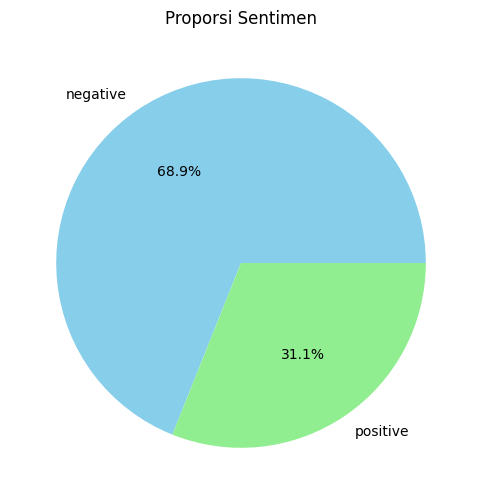

In [68]:
# Menghitung jumlah masing-masing sentimen
sentimen_counts = data['sentiment'].value_counts()

# Plot diagram lingkaran
plt.figure(figsize=(6, 6))
plt.pie(sentimen_counts, labels=sentimen_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen','lightcoral'])
plt.title('Proporsi Sentimen')
plt.show()

Text Positif pada Data

Text(0.5, 1.0, 'Word Cloud untuk Sentimen Positif')

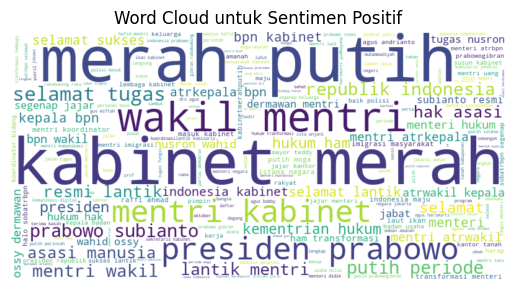

In [70]:
from wordcloud import WordCloud

# Memfilter data untuk masing-masing sentimen
positive_tweets = data[data['sentiment'] == 'positive']['clean_teks']
negative_tweets = data[data['sentiment'] == 'negative']['clean_teks']

# Membuat WordCloud untuk sentimen positif
all_positive_text = ' '.join(positive_tweets)
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(all_positive_text)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud untuk Sentimen Positif')

Text Negatif pada Data

Text(0.5, 1.0, 'Word Cloud untuk Sentimen Negatif')

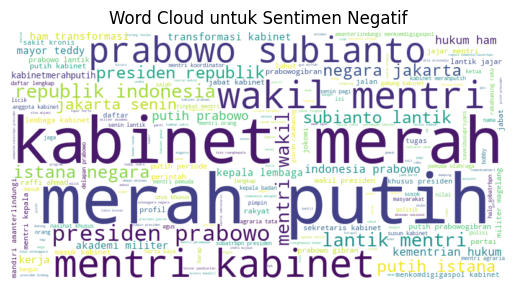

In [71]:
from wordcloud import WordCloud

# Membuat WordCloud untuk sentimen negatif
all_negative_text = ' '.join(negative_tweets)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(all_negative_text)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud untuk Sentimen Negatif')

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pickle

In [35]:
#data = pd.read_csv('data/mentri_full.csv')

### **TF-Idf**

In [ ]:
tfidf = TfidfVectorizer(max_features=8000)
tfidf.fit(data['clean_teks'])
X_tfidf = tfidf.transform(data['clean_teks'])

y = data['sentiment']

# Apply SMOTE to balance the data
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_tfidf, y)

# Check label counts after SMOTE
print("Label counts after SMOTE:")
print(pd.Series(y_smote).value_counts())

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# Display train and test set shapes
print(f"Train set shape: {X_train.shape}, {y_train.shape}")
print(f"Test set shape: {X_test.shape}, {y_test.shape}")

Label counts after SMOTE:
sentiment
negative    1381
positive    1381
Name: count, dtype: int64
Train set shape: (2209, 4750), (2209,)
Test set shape: (553, 4750), (553,)


In [74]:
# Get the feature names (terms)
terms = tfidf.get_feature_names_out()

# Function to get terms with non-zero TF-IDF scores
def get_tfidf_terms(doc_index):
    tfidf_row = X_tfidf[doc_index]
    non_zero_indices = tfidf_row.nonzero()[1]  # Get indices of non-zero elements
    terms_weights = [(terms[i], tfidf_row[0, i]) for i in non_zero_indices]
    return terms_weights

# Iterate over the first 10 documents and display their TF-IDF terms and weights
for i, text in enumerate(data['clean_teks'].head(10)):
    print(f"Text: {text}")
    print("TF-IDF Terms and Weights:")
    terms_weights = get_tfidf_terms(i)
    for term, weight in terms_weights:
        print(f"{term}: {weight:.4f}")
    print("\n" + "-"*80 + "\n")

Text: apel gelar pasu aman kunjung kerja presiden republik indonesia mentri kabinet merah putih wilayah kota magelang pagi lapang rindam iv diponegoro rabu polresmagelangkota kotamagelang presidenri kunker
TF-IDF Terms and Weights:
wilayah: 0.1879
rindam: 0.2650
republik: 0.1106
rabu: 0.1998
putih: 0.0342
presidenri: 0.2650
presiden: 0.0770
polresmagelangkota: 0.2650
pasu: 0.2418
pagi: 0.1655
merah: 0.0340
mentri: 0.0585
magelang: 0.1572
lapang: 0.2146
kunker: 0.2650
kunjung: 0.2111
kotamagelang: 0.2650
kota: 0.1914
kerja: 0.1379
kabinet: 0.0335
iv: 0.2650
indonesia: 0.0911
gelar: 0.1832
diponegoro: 0.2650
apel: 0.2650
aman: 0.1975

--------------------------------------------------------------------------------

Text: bekal akademi militer magelang menteriwamen kabinet merah putih kemah
TF-IDF Terms and Weights:
putih: 0.0726
militer: 0.3317
merah: 0.0721
menteriwamen: 0.4837
magelang: 0.3331
kemah: 0.5125
kabinet: 0.0711
bekal: 0.3883
akademi: 0.3406

--------------------------------

In [75]:
from collections import defaultdict

# Get the feature names (terms)
terms = tfidf.get_feature_names_out()

# Function to get terms with non-zero TF-IDF scores and their weights
def get_tfidf_terms(doc_index):
    tfidf_row = X_tfidf[doc_index]
    non_zero_indices = tfidf_row.nonzero()[1]  # Get indices of non-zero elements
    terms_weights = [(terms[i], tfidf_row[0, i]) for i in non_zero_indices]
    return terms_weights

# Dictionary to hold the top 50 TF-IDF weights for each label
top_50_tfidf_per_label = defaultdict(lambda: defaultdict(float))

# Iterate over all documents
for i, (text, label) in enumerate(zip(data['clean_teks'], data['sentiment'])):
    terms_weights = get_tfidf_terms(i)
    
    # Aggregate the TF-IDF weights for each term per label
    for term, weight in terms_weights:
        if term.lower() != "mentri kabinet merah putih":  # Exclude the term "mentri"
            top_50_tfidf_per_label[label][term] += weight

# Process the top 50 terms for each label
top_50_tfidf_final = {}
for label, terms_weights_dict in top_50_tfidf_per_label.items():
    # Sort by TF-IDF weight in descending order and keep the top 50
    sorted_terms_weights = sorted(terms_weights_dict.items(), key=lambda x: x[1], reverse=True)[:50]
    top_50_tfidf_final[label] = sorted_terms_weights

# Display the top 50 TF-IDF weights for each label
for label, top_terms in top_50_tfidf_final.items():
    print(f"Label: {label}")
    print("Top 50 Terms with Highest TF-IDF Weights:")
    for term, weight in top_terms:
        print(f"{term}: {weight:.4f}")
    print("\n" + "-"*80 + "\n")

Label: negative
Top 50 Terms with Highest TF-IDF Weights:
mentri: 98.3644
kabinet: 97.0655
putih: 90.4929
merah: 90.2010
prabowo: 70.9766
presiden: 55.8805
lantik: 53.2824
wakil: 50.1132
subianto: 40.3468
indonesia: 33.3507
negara: 32.5683
istana: 29.2304
jakarta: 27.0392
senin: 26.8917
republik: 26.4714
jabat: 26.0128
prabowogibran: 23.0096
kementrian: 22.8942
orang: 21.8936
hukum: 21.7391
ham: 21.6665
kepala: 21.1959
daftar: 19.9340
transformasi: 18.5738
lengkap: 17.3325
lembaga: 17.1672
jajar: 16.4501
luhut: 16.1589
kerja: 14.8904
gibran: 14.3352
teddy: 14.3284
militer: 13.6412
mayor: 13.5482
masuk: 13.0228
profil: 13.0135
akademi: 12.8521
kabinetmerahputih: 12.7255
partai: 12.7250
khusus: 12.3726
periode: 12.1582
badan: 11.9353
magelang: 11.8971
kaya: 11.5629
perintah: 11.4751
ahmad: 11.3820
raffi: 11.1007
umum: 10.9539
perempuan: 10.6626
gemuk: 10.5240
sekretaris: 10.3482

--------------------------------------------------------------------------------

Label: positive
Top 50 Term

### **Model Development**

In [77]:
data = pd.read_csv('data/mentri.csv')

Train Test Split

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold

# Vectorize the text data using TF-IDF
tfidf = TfidfVectorizer(max_features=8000)
X_tfidf = tfidf.fit_transform(data['clean_teks'])
y = data['sentiment']

# Apply SMOTE to balance the data
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_tfidf, y)

# Check label counts after SMOTE
print("Label counts after SMOTE:")
print(pd.Series(y_smote).value_counts())

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# Print shapes of the train and test sets
print(f"Train set shape: {X_train.shape}, {y_train.shape}")
print(f"Test set shape: {X_test.shape}, {y_test.shape}")

Label counts after SMOTE:
sentiment
negative    1381
positive    1381
Name: count, dtype: int64
Train set shape: (2209, 4750), (2209,)
Test set shape: (553, 4750), (553,)


SVM

In [79]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from scipy.stats import uniform
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Define the SVM model
svm_model = SVC()

# Define the parameter grid for advanced hyperparameter tuning
svm_params = {
    'C': uniform(0.1, 100),  # Uniform distribution between 0.1 and 100
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Including more kernel types
    'degree': [2, 3, 4, 5, 6, 7, 8, 10],  # Expanded range for 'poly' kernel
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1, 10],  # Expanded range for 'rbf', 'poly', and 'sigmoid' kernels
    'coef0': [0.0, 0.1, 0.5, 1.0, 2.0, 3.0],  # Expanded range for 'poly' and 'sigmoid' kernels
    'class_weight': [None, 'balanced'],  # Class weight options
    'shrinking': [True, False],  # Shrinking heuristic
    'tol': [1e-3, 1e-4, 1e-5],  # Tolerance for stopping criteria
    'max_iter': [1000, 2000, 3000, 4000, 5000]  # Maximum number of iterations
}

# Perform RandomizedSearchCV
svm_random = RandomizedSearchCV(svm_model, svm_params, n_iter=50, cv=15, scoring='accuracy', random_state=42, n_jobs=-1)
svm_random.fit(X_train, y_train)

# Get the best estimator and predictions for test data
svm_best = svm_random.best_estimator_
svm_pred_test = svm_best.predict(X_test)

# Calculate metrics for test data
accuracy_svm_test = accuracy_score(y_test, svm_pred_test)
precision_svm_test = precision_score(y_test, svm_pred_test, average='weighted')
recall_svm_test = recall_score(y_test, svm_pred_test, average='weighted')
f1_svm_test = f1_score(y_test, svm_pred_test, average='weighted')

# Get the best estimator and predictions for training data
svm_pred_train = svm_best.predict(X_train)

# Calculate metrics for training data
accuracy_svm_train = accuracy_score(y_train, svm_pred_train)
precision_svm_train = precision_score(y_train, svm_pred_train, average='weighted')
recall_svm_train = recall_score(y_train, svm_pred_train, average='weighted')
f1_svm_train = f1_score(y_train, svm_pred_train, average='weighted')

# Display the best parameters and classification report for test data
svm_best_params = svm_random.best_params_
svm_best_score = svm_random.best_score_

print(f"Best Parameters: {svm_best_params}")
print(f"Best Cross-Validation Accuracy: {svm_best_score:.4f}\n")

# Display the metrics for test data
print(f"SVM Test - Accuracy: {accuracy_svm_test:.4f}")
print(f"SVM Test - Precision: {precision_svm_test:.4f}")
print(f"SVM Test - Recall: {recall_svm_test:.4f}")
print(f"SVM Test - F1 Score: {f1_svm_test:.4f}")

# Display the metrics for training data
print(f"\nSVM Train - Accuracy: {accuracy_svm_train:.4f}")
print(f"SVM Train - Precision: {precision_svm_train:.4f}")
print(f"SVM Train - Recall: {recall_svm_train:.4f}")
print(f"SVM Train - F1 Score: {f1_svm_train:.4f}")

# Generate classification report for test data
class_report_test = classification_report(y_test, svm_pred_test, target_names=['negative', 'positive'])
print("\nClassification Report (Test Data):\n")
print(class_report_test)

c:\Users\alfar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Best Parameters: {'C': 37.55401188473625, 'class_weight': None, 'coef0': 0.5, 'degree': 10, 'gamma': 0.1, 'kernel': 'linear', 'max_iter': 2000, 'shrinking': True, 'tol': 1e-05}
Best Cross-Validation Accuracy: 0.9778

SVM Test - Accuracy: 0.9855
SVM Test - Precision: 0.9858
SVM Test - Recall: 0.9855
SVM Test - F1 Score: 0.9855

SVM Train - Accuracy: 1.0000
SVM Train - Precision: 1.0000
SVM Train - Recall: 1.0000
SVM Train - F1 Score: 1.0000

Classification Report (Test Data):

              precision    recall  f1-score   support

    negative       0.97      1.00      0.99       270
    positive       1.00      0.98      0.99       283

    accuracy                           0.99       553
   macro avg       0.99      0.99      0.99       553
weighted avg       0.99      0.99      0.99       553



Klasifikasi SVM

In [87]:
def classify_text(text, vectorizer, model):
    # Add your text preprocessing steps here
    processed_text = text_preprocessing_process(text)
    text_tfidf = vectorizer.transform([processed_text])
    svm_pred = model.predict(text_tfidf)
    
    return {'SVC': svm_pred[0]}

# Example usage with user input
input_text = input("Masukkan teks yang ingin diklasifikasikan: ")
results = classify_text(input_text, tfidf, svm_best)  

print("Input kata:", input_text)
print("\nHasil Klasifikasi:")
for model, prediction in results.items():
    print(f"{model}: {prediction}")


Input kata: gus misftah kok masuk di kabinet merah putih si

Hasil Klasifikasi:
SVC: negative


Salah Prediksi 

In [82]:
#data = pd.read_csv('baru/hasillabelling.csv')
data = data.reset_index(drop=True)

# Prediksi menggunakan model SVM
svm_pred = svm_best.predict(X_test)  # Gunakan model yang sudah dilatih (svm_best)

# Reset index pada y_test setelah split
y_test = y_test.reset_index(drop=True)

# Identifikasi kesalahan klasifikasi untuk SVM
df_salah_klasifikasi_svm = pd.DataFrame({
    'Kalimat': data.loc[y_test.index, 'clean_teks'],
    'Label Asli': y_test,
    'Prediksi SVM': svm_pred
})
df_salah_klasifikasi_svm = df_salah_klasifikasi_svm[df_salah_klasifikasi_svm['Label Asli'] != df_salah_klasifikasi_svm['Prediksi SVM']]

# Tampilkan kalimat yang salah klasifikasi oleh SVM
print("\nKalimat yang salah klasifikasi oleh SVM:")
print(df_salah_klasifikasi_svm[['Kalimat', 'Label Asli', 'Prediksi SVM']])

pd.options.display.max_colwidth = 100  # Set maximum column width to display long texts
pd.set_option('display.expand_frame_repr', False)  # Avoid wrapping of the dataframe


Kalimat yang salah klasifikasi oleh SVM:
                                                                                                                                                                                                                    Kalimat  \
98                                                                                                                                             presiden prabowo subianto umum susun kabinet merah putih mentri wakil mentri   
110                                                                                                                                                                      erick thohir sosok mentri kaya kabinet merah putih   
191                                                                                                                                 prabowogibranmerakyat prabowo gibran kabinet merah putih tolak provokasi tani sejahtera   
278  tokoh sulawesi selatan pilih gabung kabinet merah putih prabo

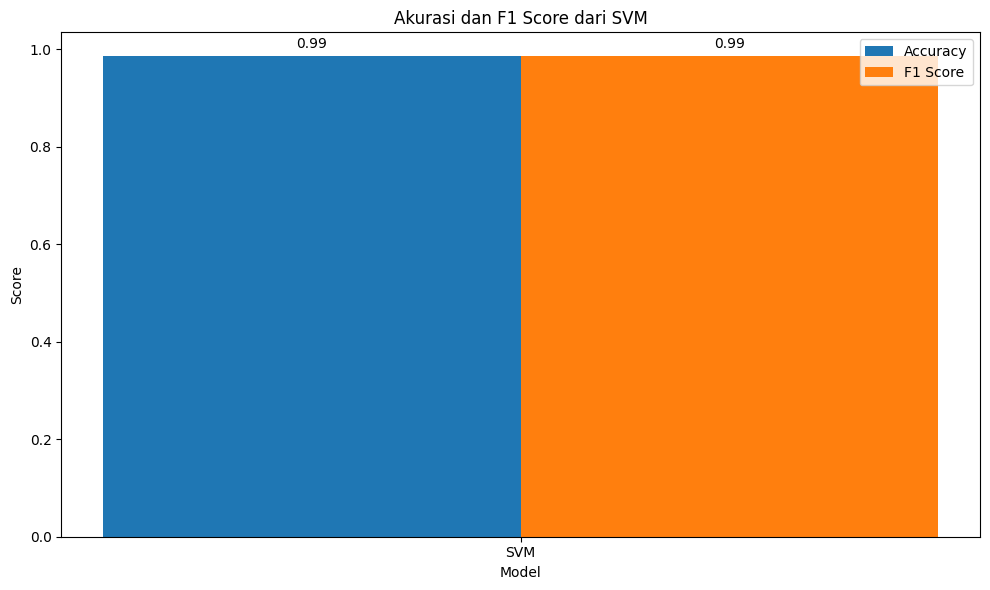

In [83]:
# Define the labels and values for SVM
models = ['SVM']
accuracy = [accuracy_svm_test]
f1_scores = [f1_svm_test]

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot accuracy and F1 score for SVM
bar_width = 0.35
index = range(len(models))

bar1 = plt.bar(index, accuracy, bar_width, label='Accuracy')
bar2 = plt.bar([i + bar_width for i in index], f1_scores, bar_width, label='F1 Score')

# Add labels, title, and legend
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Akurasi dan F1 Score dari SVM')
plt.xticks([i + bar_width / 2 for i in index], models)
plt.legend()

# Add value labels on top of the bars
for bar in bar1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, round(yval, 2), ha='center', va='bottom')
    
for bar in bar2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

In [84]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrices
conf_matrix_svm = confusion_matrix(y_test, svm_pred)

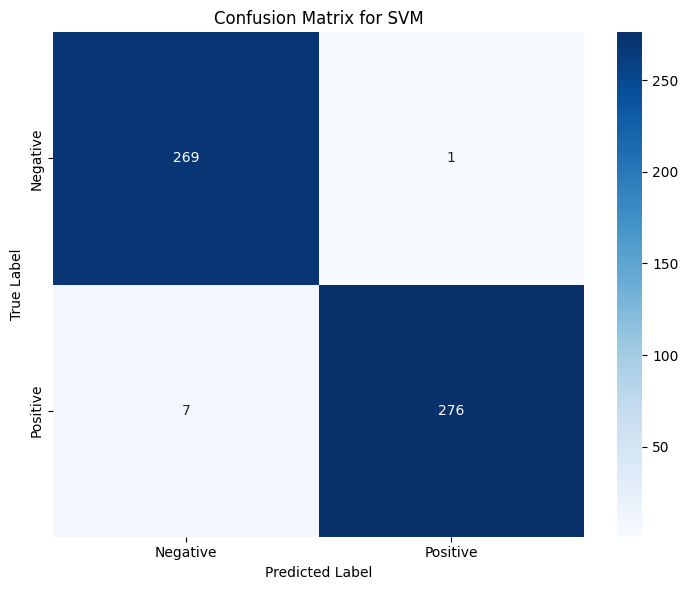

In [85]:
# Create the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the confusion matrix for SVM
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], ax=axes[0])
axes[0].set_title('Confusion Matrix for SVM')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

fig.delaxes(axes[1])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()